#**Brief**
In this project, you're working for a client who wants to create a model that can predict the price of apartments in the city of Buenos Aires — with a focus on apartments that cost less than $400,000 USD.

# **Prepare Data**
We start by importing the new dataset. We'd convert it to a dataframe, clean the data and remove the columns that are clearly not needed.

##**Import**
We start by importing the new dataset here.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# import data
df = pd.read_csv('/content/drive/MyDrive/PluralCode/Data Science With Python/buenos-aires-real-estate-1.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   8606 non-null   object 
 1   property_type               8606 non-null   object 
 2   place_with_parent_names     8606 non-null   object 
 3   lat-lon                     6936 non-null   object 
 4   price                       7590 non-null   float64
 5   currency                    7590 non-null   object 
 6   price_aprox_local_currency  7590 non-null   float64
 7   price_aprox_usd             7590 non-null   float64
 8   surface_total_in_m2         5946 non-null   float64
 9   surface_covered_in_m2       7268 non-null   float64
 10  price_usd_per_m2            4895 non-null   float64
 11  price_per_m2                6520 non-null   float64
 12  floor                       1259 non-null   float64
 13  rooms                       4752 

In [2]:
# let's see what the data in the columns looks like
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


##**Clean**

Having seen the columns and what the data in each column looks like, we can decide on the columns to take out, before moving on to removing rows with null values

In [3]:
# let's take out the columns that are obviously not needed
df.drop(['operation', 'price', 'currency', 'price_aprox_local_currency', 'price_per_m2', 'properati_url', 'expenses', 'floor'], axis='columns', inplace=True)

In [4]:
# let's take a look at our updated dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            8606 non-null   object 
 1   place_with_parent_names  8606 non-null   object 
 2   lat-lon                  6936 non-null   object 
 3   price_aprox_usd          7590 non-null   float64
 4   surface_total_in_m2      5946 non-null   float64
 5   surface_covered_in_m2    7268 non-null   float64
 6   price_usd_per_m2         4895 non-null   float64
 7   rooms                    4752 non-null   float64
dtypes: float64(5), object(3)
memory usage: 538.0+ KB


,property_type,place_with_parent_names,lat-lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms
0,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,120.0,110.0,1500.000000,4.0
1,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,117.0,120.0,2136.752137,4.0
2,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,410.0,220.0,1000.000000,NaN
3,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,200.0,135.0,900.000000,5.0
4,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,76.0,70.0,1697.368421,NaN


In [5]:
# Since we want to build a linear regression model, lets focus on a continuous variables instead of categorical ones
# so let's drop more columns: 'lat-lon', 'surface_total_in_m2', 'price_usd_per_m2', 'price_usd_per_m2'
df.drop(['lat-lon', 'surface_total_in_m2', 'price_usd_per_m2', 'price_usd_per_m2', 'rooms'], axis='columns', inplace=True)

In [6]:
# let's check what our dataframe now looks like
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            8606 non-null   object 
 1   place_with_parent_names  8606 non-null   object 
 2   price_aprox_usd          7590 non-null   float64
 3   surface_covered_in_m2    7268 non-null   float64
dtypes: float64(2), object(2)
memory usage: 269.1+ KB


##**Subset of Data**

In building our client's model, we need to focus on listings that meet three conditions:

- listing has to be an apartment type
- has to be in the city of Buenos Aires
- costs less than $400,000 USD

Based on these three conditions, we need to create a subset of the data.

In [7]:
# Entire homes/apartments in Ward 115, less than $50,000

# 1. has to be an apartment type
df = df[df['property_type'] == 'apartment']
# df['property_type'].unique()

# 2. has to be in the city of Buenos Aires
df = df[df['place_with_parent_names'].str.contains('Capital Federal')]

# 3. costs less than $400,000 USD
df = df[df['price_aprox_usd'] < 400000]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 8604
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            1781 non-null   object 
 1   place_with_parent_names  1781 non-null   object 
 2   price_aprox_usd          1781 non-null   float64
 3   surface_covered_in_m2    1635 non-null   float64
dtypes: float64(2), object(2)
memory usage: 69.6+ KB


,property_type,place_with_parent_names,price_aprox_usd,surface_covered_in_m2
0,apartment,|Argentina|Capital Federal|Villa Crespo|,180000.0,110.0
4,apartment,|Argentina|Capital Federal|Chacarita|,129000.0,70.0
9,apartment,|Argentina|Capital Federal|Villa Luro|,87000.0,42.0
11,apartment,|Argentina|Capital Federal|Once|,60000.0,28.0
20,apartment,|Argentina|Capital Federal|San Nicolás|,69000.0,22.0


In [8]:
# now we can take out the rest of the null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1635 entries, 0 to 8604
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            1635 non-null   object 
 1   place_with_parent_names  1635 non-null   object 
 2   price_aprox_usd          1635 non-null   float64
 3   surface_covered_in_m2    1635 non-null   float64
dtypes: float64(2), object(2)
memory usage: 63.9+ KB


##**Explore**

Let's look at the distribution of apartment sizes in our dataset, so that we are sure property size is an important factor in determining price.

 **Visualisation**

 We will reate a histogram of "surface_covered_in_m2". The x-axis will be labelled "Area [sq meters]" and the plot will have the title "Distribution of Apartment Sizes".

Text(0.5, 1.0, 'Distribution of Apartment Sizes')

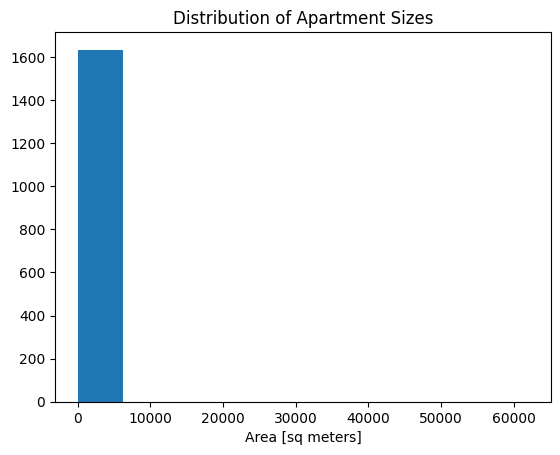

In [9]:
# histogram showing distribution of apartment sizes.

plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Apartment Sizes')

In [10]:
# the visualisation is showing that we need to take a deeper exploration of our data
# let's check out the summary statistics

df['surface_covered_in_m2'].describe()

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

In [11]:
# let's see the values around the min and max values
df['surface_covered_in_m2'].sort_values()

1589        0.0
4391        0.0
972         0.0
269         0.0
7564        0.0
         ...   
1583      240.0
4758      240.0
2072      274.0
5744      605.0
3103    62034.0
Name: surface_covered_in_m2, Length: 1635, dtype: float64

In [12]:
# let's go ahead and trim out the outlier values on both ends

low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
df = df[df['surface_covered_in_m2'].between(low, high)]

Text(0.5, 1.0, 'Distribution of Apartment Sizes')

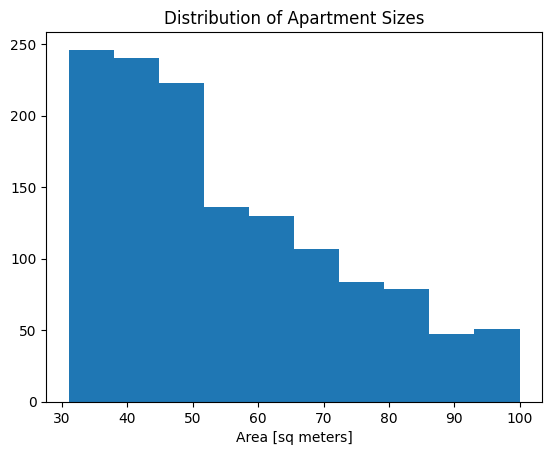

In [13]:
# let's look at what we now have
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Apartment Sizes')

**Relationship between Apartment Size and Price**

Now that our dataset is free of outliers, it's time to start exploring the relationship between apartment size and price. Let's use one of the tools we learned in the last project.

Text(0.5, 1.0, 'Buenos Aires Price vs. Area')

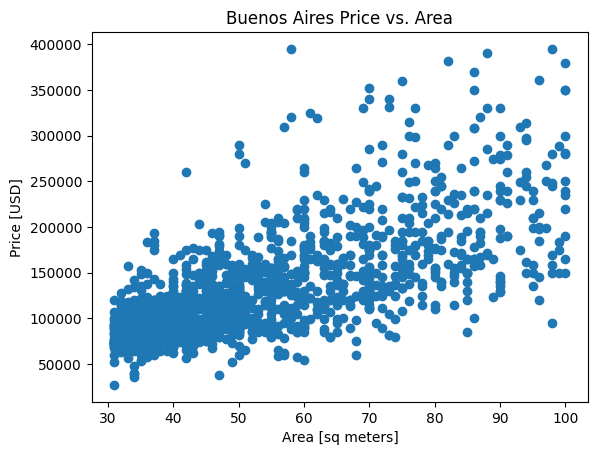

In [14]:
# let's create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2")
plt.scatter(x=df['surface_covered_in_m2'], y=df['price_aprox_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Buenos Aires Price vs. Area')

**Linear Model**

Linear model is basically about line and distance, what does this mean?

Linear model aims to create a line that best represents the relationship between the feature and target. This line can be used to make predictions.
The distance refers to how close or far the model line is to the line that represents the relationship that exists in the data.

When training a model, the model is trying find the best point within the data to place the line.

The scatter plot above shows that, to a significant extent, there's a positive correlation between apartment price and size. If we want to predict price, then size will be a good feature to use.

**Split**

Before going on to build the model, we need to split the **target** (the thing you want to predict) from the **feature** (the information your model will use to make its predictions). For this model, we'll use the feature: apartment size, to predict the target: price.

In [15]:
# the feature, should be a matrix: a two dimensional array
# the variable should be an upper-case X
# since its training data, we add the train description to the variable name

X_train = df[['surface_covered_in_m2']] # there are two square brackets here, to make a (2 dimensional) dataframe

In [16]:
# the target, should be a matrix: a one dimensional array
# the variable should be an lower-case X
# since its training data, we add the train description to the variable name

y_train = df['price_aprox_usd'] # there is one square bracket here, to make a (1 dimensional) array/sequence

# **Build Model**

**Baseline Model**

First step in creating our predictive model is to create a baseline model. We will be using this baseline model to compare our model to measure the performance of our model.

The baseline model is a dumb model, it will always predict the same price value, for every area value passed to it. The price it will always predict is the mean of the y_train values (the price values).

In [17]:
# first let's calculate the mean of all prices, i.e y_train values
y_mean = y_train.mean()

# then we generate a list that repeats the mean (the prediction) for every entry in our dataset.
y_pred_baseline = [y_mean] * len(y_train)

Now we have our baseline model, let's plot it on the scatter plot we created earlier.

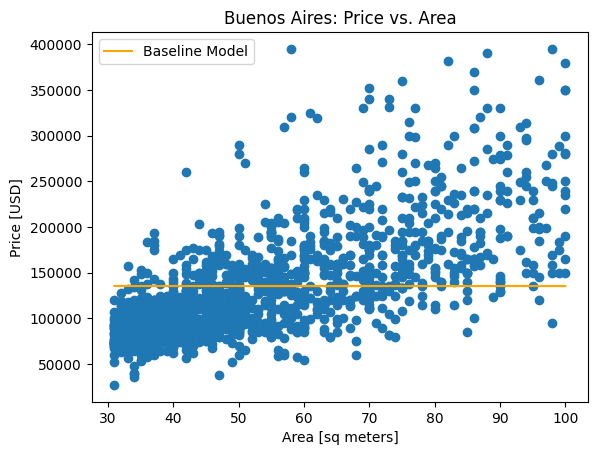

In [18]:
plt.plot(X_train.values, y_pred_baseline, color='orange', label='Baseline Model')
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

From the visualization, it is obvious that our baseline model doesn't really follow the trend in the data. We can also use a more scientific approach to ascertain this, **mean absolute error**.

The mean absolute error is one of the different ways by which **performance metric** can be measured

In [19]:
# to calculate the mean absolute error for our baseline, need to import the mean_absolute_error method from sklearn.metrics module
from sklearn.metrics import mean_absolute_error

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apartment price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apartment price 135527.84
Baseline MAE: 45199.46


Now, we have a mean absolute error for our baseline model. It is this value that we will use to evaluate our predictive model.

Once we create and train our model, we will calculate its mean absolute error as well. Our model's mean absolute error has to be less than that of the baseline, or else it won't be a useful model.

**Iterate**

The next step we will be taking is the Iteration process, which involves building a the model, training it, and then evaluating it.

In [20]:
# creating the (Linear Regression) model
# to create the model, we need to import the LinearRegression method from sklearn.linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# next is to train our model, or fit it to the training data
model.fit(X_train, y_train)

LinearRegression()

the final step in the **iteration** process is to evaluate the model.

First we'd test its prediction abilities with the data used in training it:
- we'd give it the training 'surface_covered_in_m2' values, for it to predict price values.
- We'd then calculate the mean absolute error.

Next, we'd test the model using data not used in training it; **test dataset**
- we'd give the model the test data's 'surface_covered_in_m2' values, for it to predict price values.
- We'd then calculate the mean absolute error, again.

In [21]:
# let's use the predict method to generate prediction values, based on the X_train ()'surface_covered_in_m2') values
# the values are stored in the 'y_pred_training' variable
y_pred_training = model.predict(X_train)


# let's see what we have. (the [:5] there means only 5 values should be printed out)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [22]:
# to measure our model's performance with the training data, let's calculate the mean absolute error.
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training Mean Absolute Error:", round(mae_training, 2))

Training Mean Absolute Error: 31248.26


In [23]:
# let's now compare the training Mean Absolute Error of our model, with that of the baseline
print("Training Mean Absolute Error:", round(mae_training, 2))
print("Baseline Mean Absolute Error:", round(mae_baseline, 2))
print('The difference between the Mean Absolute Error of the Baseline, and that of our model using training data is:',
      round(mae_baseline, 2) - round(mae_training, 2));

Training Mean Absolute Error: 31248.26
Baseline Mean Absolute Error: 45199.46
The difference between the Mean Absolute Error of the Baseline, and that of our model using training data is: 13951.2


Remember when we said, *Our model's mean absolute error has to be less than that of the baseline, or else it won't be a useful model.*

Looking at the difference between the mean absolute error values, we can confidently say our model will be helpful in predicting apartment prices, since it beats the baseline Mean Absolute Error by more than $10,000.

The test above gives a positive impression of our model, but it doesn't end there. We still need to evaluate how our model performs on data that it hasn't seen before, data that we call the test dataset.

In [30]:
# let's import a test dataset
pd_testdata = pd.read_csv('/content/drive/MyDrive/PluralCode/Data Science With Python/buenos-aires-test-features.csv')
pd_testdata.head()
# we get the feature matrix from the data
# X_test = pd_testdata[['surface_covered_in_m2']]

# we also get the target vector from the data
# y_test = pd_testdata['price_aprox_usd']

,surface_covered_in_m2,lat,lon,neighborhood
0,47,-34.615310,-58.361983,Puerto Madero
1,55,-34.547298,-58.462705,Nuñez
2,34,-34.617762,-58.383662,Monserrat
3,34,-34.639925,-58.438406,Parque Chacabuco
4,42,-34.611495,-58.442359,Caballito


In [25]:
# @title
# next is to use our model to predict prices using test data
y_pred_test = model.predict(X_test)

# let's see what we have
y_pred_test[:5]

array([117330.05890084, 135355.03782307,  88039.46815224,  88039.46815224,
       106064.44707446])

In [27]:
# we then calculate the test Mean Absolute Error
# you have to do this step yourself
# take a cue from how we calculated the mean absolute errors previously
# compare what you get with the Mean Absolute Error of the baseline, and draw your conclusions

mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test Mean Absolute Error:", round(mae_training, 2))

NameError: name 'y_test' is not defined

# **Communicate Results**

This section will be updated once the previous sections have been mastered.